## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [8]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [9]:
df = pd.read_csv('data/Mall_Customers.csv')

#### Show Top 5 Records

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Delete/Drop unwanted column

In [11]:
df.drop("CustomerID", axis=1, inplace=True)

#### Preparing X and Y variables

In [12]:
X = df.drop(columns=['Spending Score (1-100)'],axis=1)

In [13]:
X.head()

,Gender,Age,Annual Income (k$)
0,Male,19,15
1,Male,21,15
2,Female,20,16
3,Female,23,16
4,Female,31,17


In [14]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['Gender'].unique())

Categories in 'gender' variable:      ['Male' 'Female']


In [15]:
y = df['Spending Score (1-100)']

In [16]:
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [17]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([("OneHotEncoder", oh_transformer, cat_features),
                                  ("StandardScaler", numeric_transformer, num_features),])

In [18]:
X = preprocessor.fit_transform(X)

In [19]:
X.shape

(200, 4)

In [20]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((160, 4), (40, 4))

#### Create an Evaluate Function to give all metrics after model Training

In [21]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse =mean_squared_error(true, predicted, squared=False)
    margin_of_error=rmse/true.mean() # margin of error 
    r2_square = r2_score(true, predicted)
    
    return mae, rmse, margin_of_error, r2_square

In [22]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_margin_of_error, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_margin_of_error, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Margin of Error: {:.4f}".format(model_train_margin_of_error))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Margin of Error: {:.4f}".format(model_test_margin_of_error))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 24.9912
- Mean Absolute Error: 20.8863
- Margin of Error: 0.4827
- R2 Score: 0.0997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 21.8832
- Mean Absolute Error: 18.1031
- Margin of Error: 0.4985
- R2 Score: 0.0291


Lasso
Model performance for Training set
- Root Mean Squared Error: 25.0343
- Mean Absolute Error: 20.8014
- Margin of Error: 0.4835
- R2 Score: 0.0965
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 21.8195
- Mean Absolute Error: 17.9232
- Margin of Error: 0.4970
- R2 Score: 0.0348


Ridge
Model performance for Training set
- Root Mean Squared Error: 24.9895
- Mean Absolute Error: 20.8613
- Margin of Error: 0.4827
- R2 Score: 0.0998
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 21.9251
- Mean Absolute Error: 18.1425
- Margin of Error: 0.4994
- R2 Score: 0.02

### Results

In [23]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
8,AdaBoost Regressor,0.349532
3,K-Neighbors Regressor,0.159533
5,Random Forest Regressor,0.107062
1,Lasso,0.034771
0,Linear Regression,0.029124
2,Ridge,0.025403
7,CatBoosting Regressor,-0.018444
6,XGBRegressor,-0.252469
4,Decision Tree,-0.583256


## Plot y_pred and y_test

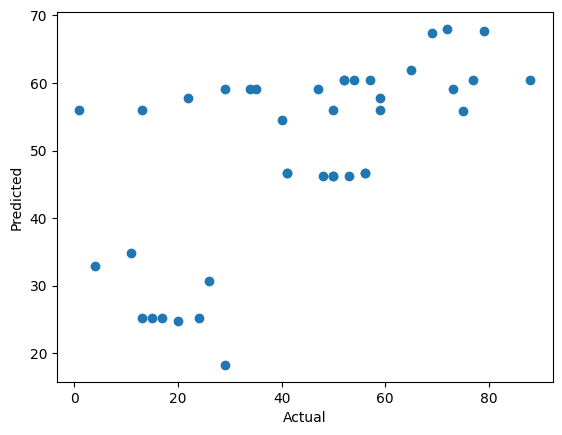

In [25]:
plt.scatter(y_test,y_test_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

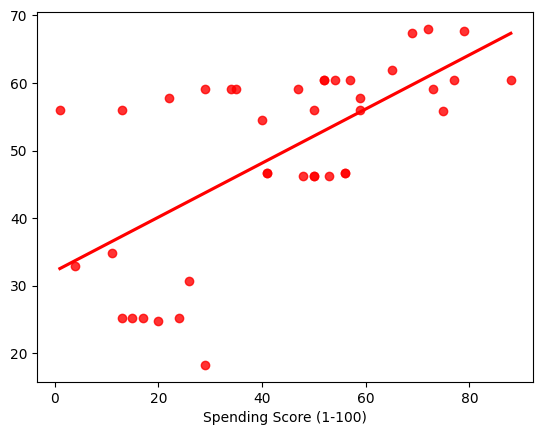

In [26]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [28]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_test_pred,'Difference':y_test-y_test_pred})
pred_df

,Actual Value,Predicted Value,Difference
95,52,60.461538,-8.461538
15,79,67.655172,11.344828
30,4,32.909091,-28.909091
158,1,56.017391,-55.017391
128,11,34.818182,-23.818182
115,50,56.017391,-6.017391
69,47,59.116667,-12.116667
170,13,56.017391,-43.017391
174,13,25.300000,-12.300000
45,65,61.933333,3.066667
